# Use datasets come along with scikit-learn to get familiar with different kind of learning models

## use breast_cancer dataset to fit LogisticRegression model, using PCA technique to reduce features and StandardScaler to normalize features

In [91]:
# Load general modules/libs that will be used for every case. Special modules will be loaded in separate cases specifically.
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt


In [ ]:
Bdata = datasets.load_breast_cancer()
X = Bdata.data
y = Bdata.target

In [3]:
# split dataset into training and testing datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.3, random_state = 1, stratify = y)

In [11]:
# do data scaling
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()
X_train_scaled = SC.fit_transform(X_train)
X_test_scaled = SC.transform(X_test)

In [15]:
# feature selection
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
X_train_PCA = pca.fit_transform(X_train_scaled)
X_test_PCA = pca.transform(X_test_scaled)

In [23]:
# train LogisticRegression model
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(penalty='l2', dual=False, tol=0.0003, C=1.0, fit_intercept=True, intercept_scaling=1,
                        class_weight="balanced", random_state=1, solver='sag', max_iter=10000, multi_class='auto',
                        verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
LR.fit(X_train_PCA, y_train)

LogisticRegression(class_weight='balanced', max_iter=10000, random_state=1,
                   solver='sag', tol=0.0003)

In [7]:
# model metrics
import sklearn.metrics as metrics
y_pred = LR.predict(X_test_PCA)
y_true = y_test
metrics.accuracy_score (y_true, y_pred)

0.9649122807017544

## use SVM model

In [14]:
# import linear support vector classifier (SVC)
from sklearn.svm import LinearSVC
LS = LinearSVC(penalty='l2', loss='squared_hinge', dual=True, tol=0.0001, C=1.0, multi_class='ovr', fit_intercept=True, intercept_scaling=1,
               class_weight=None, verbose=0, random_state=1, max_iter=1000)
LS.fit(X_train_PCA, y_train)

d:\ProgramData\envs\python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=1)

In [17]:
y_pred = LR.predict(X_test_PCA)
y_true = y_test
metrics.accuracy_score (y_true, y_pred)

0.9415204678362573

## try regression model instead classifier model on the same dataset

In [33]:
from sklearn.linear_model import LinearRegression
LiR = LinearRegression()
LiR.fit(X_train_PCA, y_train)

LinearRegression()

In [35]:
# import regression metrics 
from sklearn.metrics import r2_score
y_pred = LiR.predict(X_test_PCA)
y_true = y_test
r2_score (y_true, y_pred)

0.7248717036706707

## Use boston dataset

In [3]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
df = pd.read_csv(data_url, sep="\s+", skiprows=22, header = None)
data = np.hstack([df.values[::2, :], df.values[1::2, :2]])
target = df.values[1::2, 2]
X_1 = data
y = target

In [4]:
# data preprocessing - handling missing data
from sklearn.impute import SimpleImputer
imr = SimpleImputer(missing_values=np.nan, strategy='mean')
X = imr.fit_transform(X_1)

In [9]:
# split dataset into train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
# scaling features
X_train_scaled = SC.fit_transform(X_train)
X_test_scaled = SC.transform(X_test)


In [87]:
# selecting features (reduce feature dimensions)
pca = PCA(n_components=8, svd_solver='auto')
X_train_PCA = pca.fit_transform(X_train_scaled)
X_test_PCA = pca.transform(X_test_scaled)

In [88]:
# fit LinearRegression trainig model
from sklearn.linear_model import LinearRegression
LiR = LinearRegression()
LiR.fit(X_train_PCA, y_train)
# predicting with test data
LiR.predict(X_test_PCA)

array([27.95047477, 27.33686019, 18.3059829 , 23.22911714, 17.92570695,
       20.43514194, 27.68609304, 18.13235363, 23.10097778, 26.269002  ,
       25.39854503, 29.89110657, 21.03380664, 23.46613592, 21.77778125,
       17.58557666, 17.90954768, 38.27469183, 27.48296397, 12.49776112,
       20.48118681, 18.88405656, 25.12527742, 26.07543237, 28.63159976,
       10.14310235, 14.00840924, 21.49252154, 35.73280866, 13.44200502,
       25.5149589 , 15.01941195, 38.46137394, 19.09318254, 25.64037491,
       21.70407485, 18.31971002, 29.73490105,  6.30665415, 19.16783558,
       28.0802553 , 24.28952197, 27.55200616, 14.35236455, 17.87904955,
       16.28133984, 39.79077028, 17.67240539, 24.39539303, 18.70554296,
       25.18572112, 24.53184152, 26.36491748, 25.36139975,  6.69419039,
       23.93373363, 11.72570976, 26.09926775, 17.76633884, 36.5538239 ,
       19.69030797, 27.40530831, 15.45812632, 16.20714841, 13.01560503,
       30.95221706, 37.50512072, 27.69436191, 24.8772997 , 24.04

In [41]:
# import regression metrics 
from sklearn.metrics import r2_score
y_pred = LiR.predict(X_test_PCA)
y_true = y_test
r2_score (y_true, y_pred)

0.7713837173165807

## Polynomial Regression on Boston Datasets, interaction_only=True

In [89]:
# import Polynomial Regression in data preprocessing phase
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
model = Pipeline([('poly', PolynomialFeatures(interaction_only=True)),
                    ('linear', LinearRegression(fit_intercept=False))])
model.fit(X_train_PCA, y_train)
y_pred = model.predict(X_test_PCA)
y_true = y_test

In [90]:
# import regression metrics 
from sklearn.metrics import r2_score
r2_score (y_true, y_pred)

0.8749566278752258

## Handwriting digits recognition. Using datasets come along with scikit-learn. load_digits 

In [ ]:
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
digits = datasets.load_digits()

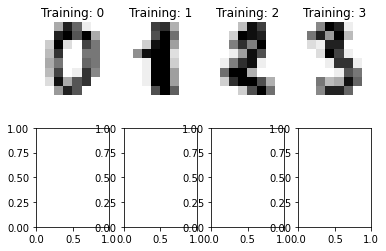

In [126]:
# use matplotlib to show the images data
_, axes = plt.subplots(2, 4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

In [143]:
# flatten the image data structure from 2d array to 1d array. Split flattened training data 
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False, random_state = 1)

In [144]:
classifier = svm.SVC(gamma = 0.001)
classifier.fit(X_train, y_train)
predicted = classifier.predict(X_test)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




d:\program files\python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


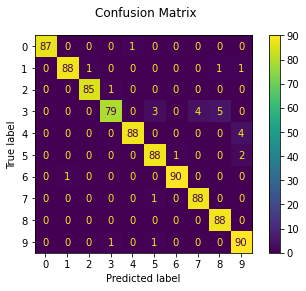

In [145]:
# Plot the predict result
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for ax, (image, prediction) in zip(axes[1, :], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

plt.show()

In [146]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [147]:
data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])